# Pair Programming Correlación y covarianza

---

##### ` Como comentamos en al final del pair anterior: Luego de relizar todo el analisis estadístico al ver que las categorias de la columna 'status' (desarrollados y en desarrollo) son muy ambiguas, es decir son heterocedasticas, por lo que hemos decidido dividir el dataframe en dos, uno por cada categoría y optamos por trabajar con los paises en desarrollo.`

---

In [6]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos
from scipy import stats
import researchpy as rp
from scipy.stats import levene

#Warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,15) 

In [7]:
df= pd.read_csv('../files/endesarrollo.csv', index_col=0)
df.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,...,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,65.0,1154.0,...,83.0,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,62.0,492.0,...,86.0,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0


---

### 1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

`- Covarianza indica si ambas variables varían en la misma dirección. Si esta es positiva aumenta el valor de una variable y aumenta el valor de la otra, mientras que si es negativa disminuye el valor de la una y el de la otra.`

`- Correlación nos muestra si exite relación y el grado de la misma, y nos indica con qué fuerza están relacionadas, a diferencia de la covarianza que sólo nos indica la dirección.`

---

### 2. Calculad la covarianza y la correlación de nuestro dataset. 
No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [1]:
# Análisis gráfico, en este caso de deja comentado ya que contamos con numerosas columnas.
#sns.pairplot(df);

In [9]:
df.cov()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,21.295660,7.790398,-48.170682,-15.623444,-0.941570,24.249945,-5.186765e+03,10.688318,-25.605025,11.436185,0.934791,16.227295,-3.998317,5.434142e+03,-1.124985,-1.215576,0.263837,3.469145
life_expectancy,7.790398,81.484033,-765.292725,-175.884990,6.686490,87.871374,-1.563069e+04,97.308896,-285.298472,97.734736,1.923551,103.585210,-28.560081,2.831353e+04,-14.541232,-14.565130,1.207809,19.512150
adult_mortality,-48.170682,-765.292725,16373.210500,1056.423004,-17.308603,-653.271780,2.346511e+04,-887.920371,1778.449176,-739.995014,-4.792885,-757.493851,365.988696,-2.534168e+05,125.702804,132.281024,-10.189193,-154.907451
infant_deaths,-15.623444,-175.884990,1056.423004,4332.326240,-13.337314,-404.145248,4.274203e+05,-366.582492,6199.261000,-374.610845,-23.623948,-380.409205,22.458155,-7.410243e+04,76.495671,78.298165,-2.850365,-59.434049
alcohol,-0.941570,6.686490,-17.308603,-13.337314,10.920241,5.251322,3.401973e+02,13.334733,-14.763211,11.234795,1.491032,11.366320,0.900058,4.555939e+03,-4.375136,-4.257030,0.204293,4.341927
hepatitis_b,24.249945,87.871374,-653.271780,-404.145248,5.251322,666.137606,-4.778906e+04,109.307249,-630.945570,374.559066,5.661331,455.566912,-20.140280,2.574538e+04,-12.247744,-12.671347,1.602096,28.451557
measles,-5186.765432,-15630.686762,23465.105853,427420.346537,340.197300,-47789.063643,1.427971e+08,-35145.614010,612773.890365,-35692.298875,-2422.428677,-37574.908471,1916.213141,-6.803700e+06,5763.567861,5556.686953,-310.360727,-4863.908525
bmi,10.688318,97.308896,-887.920371,-366.582492,13.334733,109.307249,-3.514561e+04,374.891130,-542.910322,121.196757,7.354042,121.330064,-24.700289,5.166831e+04,-41.345133,-43.015032,1.878175,31.448726
under-five_deaths,-25.605025,-285.298472,1778.449176,6199.261000,-14.763211,-630.945570,6.127739e+05,-542.910322,9027.919549,-591.967066,-32.704979,-610.363068,42.270338,-1.082140e+05,111.822348,113.519329,-4.610494,-91.061364
polio,11.436185,97.734736,-739.995014,-374.610845,11.234795,374.559066,-3.569230e+04,121.196757,-591.967066,607.813775,5.760953,404.242646,-18.567466,3.786635e+04,-16.229438,-16.717960,1.750482,30.618669


In [10]:
df.columns

Index(['country', 'status', 'continente', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

### `Análisis de la covarianza respecto a la variable respuesta`
Realizaremos un análisis de covarianza de las variables en relación a la variable respuesta, life expentancy. No se incluye en el análisis a la columna año, ya que la misma a pesar de tener valores numéricos es una variable categórica.

- Adult mortality: La variable life expectancy tiene una covarianza negativa, ello implica que cuanto mayor mortalidad de adultos menor será la expectativa de vida.

- Infant deaths: Tiene una covarianza negativa respecto a la variable respuesta, ello implica que cuanto mayor mortalidad infantil menor será la expectativa de vida.

- Alcohol: Tiene una covarianza postiva, es decir, cuanto más crezca el consumo de alcohol, también aumenta la expectativa de vida. Tras esta revisión consideramos pertienente revisar esta columna, porque esta dirección está distorcionada.

- Hepatitis B: Covarianza positiva, cuanto más protegida está la población con vacunas contra la hepatitis B, mayor expectativa de vida.

- Measles/Sarampión: Covarianza positiva, cuanto más protegida está la población con vacunas contra el sarampión, mayor expectativa de vida.

- BMI/Índice de masa corporal medio: Existe una covarianza positiva, cuanto mayor índice de masa corporal, mayor expectativa de vida.

- Under-five deaths: Tiene una covarianza negativa respecto a la variable respuesta, ello implica que cuanto mayor mortalidad infantil menor será la expectativa de vida.

- Poli: Covarianza positiva, cuanto más protegida está la población con vacunas contra la polio, mayor expectativa de vida.

- Total expenditure/ Gasto de las administraciones públicas en sanidad: Covarianza positiva, ello significa que a mayor gasto en sanidad, mayor expectativa de vida.

- Diphtheria/ Cobertura de vacunación contra la difteria: Covarianza positiva, cuanto más protegida está la población con vacunas contra la difteria, mayor expectativa de vida.

- HIV/AIDS/Muertes por cada 1 000 nacidos vivos VIH/SIDA: Covarianza negativa, cuantas más muertes, menor expectativa de vida.

- GDP/Producto Interior Bruto per cápita: Covarianza positiva, cuanto mayor PIB per capita, mayor expectativa de vida.

- Thinness  1-19 years / Prevalencia de la delgadez entre niños y adolescentes de 10 a 19 años: Covarianza negativa, cuanta mayor delgadez, menor será la expectativa de vida.

- Thinness 5-9 years'/Prevalencia de la delgadez entre los niños de 5 a 9 años: Covarianza negativa, cuanta mayor delgadez, menor será la expectativa de vida.

- Income composition of resources/Índice de Desarrollo Humano: Covarianza positiva, cuanto más alto sea el índice de desarrollo humano, mayor será la expectativa de vida.

- Schooling/Número de años de escolarización: Covarianza positiva, cuanto mayor sea la escolarizaicón del país, mayor será la expectativa de vida.


In [11]:
df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
year,1.000000,0.187016,-0.081577,-0.051436,-0.061743,0.203603,-0.094057,0.119622,-0.058396,0.100520,0.093728,0.141899,-0.156326,0.144379,-0.058885,-0.062547,0.282963,0.244856
life_expectancy,0.187016,1.000000,-0.662559,-0.296027,0.224154,0.377163,-0.144905,0.556754,-0.332636,0.439165,0.098598,0.463065,-0.570850,0.384570,-0.389108,-0.383129,0.662218,0.704049
adult_mortality,-0.081577,-0.662559,1.000000,0.125433,-0.040934,-0.197809,0.015346,-0.358389,0.146279,-0.234572,-0.017331,-0.238887,0.516059,-0.242821,0.237292,0.245470,-0.394105,-0.394311
infant_deaths,-0.051436,-0.296027,0.125433,1.000000,-0.061319,-0.237900,0.543419,-0.287646,0.991255,-0.230852,-0.166070,-0.233223,0.061562,-0.138035,0.280725,0.282461,-0.214328,-0.294109
alcohol,-0.061743,0.224154,-0.040934,-0.061319,1.000000,0.061570,0.008615,0.208409,-0.047019,0.137900,0.208771,0.138798,0.049142,0.169036,-0.319801,-0.305885,0.305968,0.427957
hepatitis_b,0.203603,0.377163,-0.197809,-0.237900,0.061570,1.000000,-0.154948,0.218733,-0.257286,0.588644,0.101493,0.712279,-0.140793,0.122302,-0.114625,-0.116576,0.307217,0.359053
measles,-0.094057,-0.144905,0.015346,0.543419,0.008615,-0.154948,1.000000,-0.151900,0.539693,-0.121152,-0.093797,-0.126887,0.028932,-0.069808,0.116503,0.110414,-0.128542,-0.132574
bmi,0.119622,0.556754,-0.358389,-0.287646,0.208409,0.218733,-0.151900,1.000000,-0.295108,0.253894,0.175741,0.252869,-0.230170,0.327182,-0.515795,-0.527515,0.480090,0.529035
under-five_deaths,-0.058396,-0.332636,0.146279,0.991255,-0.047019,-0.257286,0.539693,-0.295108,1.000000,-0.252708,-0.159265,-0.259224,0.080268,-0.139639,0.284276,0.283690,-0.240156,-0.312158
polio,0.100520,0.439165,-0.234572,-0.230852,0.137900,0.588644,-0.121152,0.253894,-0.252708,1.000000,0.108121,0.661663,-0.135883,0.188315,-0.159010,-0.161015,0.351408,0.404515


### `Análisis de la correlación entre las variables predictoras`

A diferencia del análisis de covarianza, el análisis de correlación observa la correlación entre las variables predictoras, con el fin de conocer si proporcionan información repetitiva.

La `correlación` varía entre -1 y 1. La correlación no nos indica unicamente la dirección (positiva o negativa), también nos indica la "fuerza" de esa relación. De esta forma: 

                    - 0 Nula

                    - 0   – 0.2 Muy baja

                    - 0.2 – 0.4 Baja

                    - 0.4 – 0.6 Moderada

                    - 0.6 – 0.8 Alta

                    - 0.8 – <1 Muy alta

                    - 1 Perfecta

- Adult mortality: Tiene una relación moderada positiva con la columna hvi/aids. No hay tiene correlación fuerte con ninguna variable.

- Infant deaths: Tiene una correlación muy alta positiva con la variable "Under-five deaths", es decir proporcionan información repetitiva.

- Alcohol: No tiene una correlación significativa con ninguna variable predictora.

- Hepatitis B: Tiene una correlación alta positiva con las variables difteria y polio.

- Measles/Sarampión: Tiene una correlación moderada positiva con la variable de muertes de menores de cinco años.

- BMI/Índice de masa corporal medio: Tiene una  correlación moderada positiva con las variables escolaridad e índice de darrollo humano. Tiene una correlación moderada negativa con delgadez de 1 a 19 años y de 5 a 9 años.

- Under-five deaths: Tiene una correlación fuerte positiva con muerte de infantes  variable respuesta,es decir proporcionan información repetitiva.

- Polio: Tiene una correlación alta positiva con hepatitis B y con difteria.

- Total expenditure/ Gasto de las administraciones públicas en sanidad: No tiene una correlación significativa con ninguna variable predictora.

- Diphtheria/ Cobertura de vacunación contra la difteria: Tiene una correlación alta positiva con hepatitis b y polio. Es decir proporcionan información repetitiva.

- HIV/AIDS/Muertes por cada 1 000 nacidos vivos VIH/SIDA: Riene una correlación moderada positiva con la mortalidad adulta.

- GDP/Producto Interior Bruto per cápita: No tiene correlaciones significativas con las variables predictoras.

- Thinness  1-19 years / Prevalencia de la delgadez entre niños y adolescentes de 10 a 19 años: Tiene una correlación muy alta positiva con Thinness 5-9 years'. Es decir proporcionan información redundante.

- Thinness 5-9 years'/Prevalencia de la delgadez entre los niños de 5 a 9 años: Tiene una correlación muy alta positiva con Thinness 5-9 years'. Es decir proporcionan información redundante.

- Income composition of resources/Índice de Desarrollo Humano: Tiene una correlación muy alta con la escolaridad. Sin emabrgo, consideramos que ambas variables proporcionan diferente infromación, es decir, no son redundantes.

- Schooling/Número de años de escolarización: Tiene una correlación muy alta positiva con el índice de desarrollo humano. Sin emabrgo, consideramos que ambas variables proporcionan diferente infromación, es decir, no son redundantes.

---

### 3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

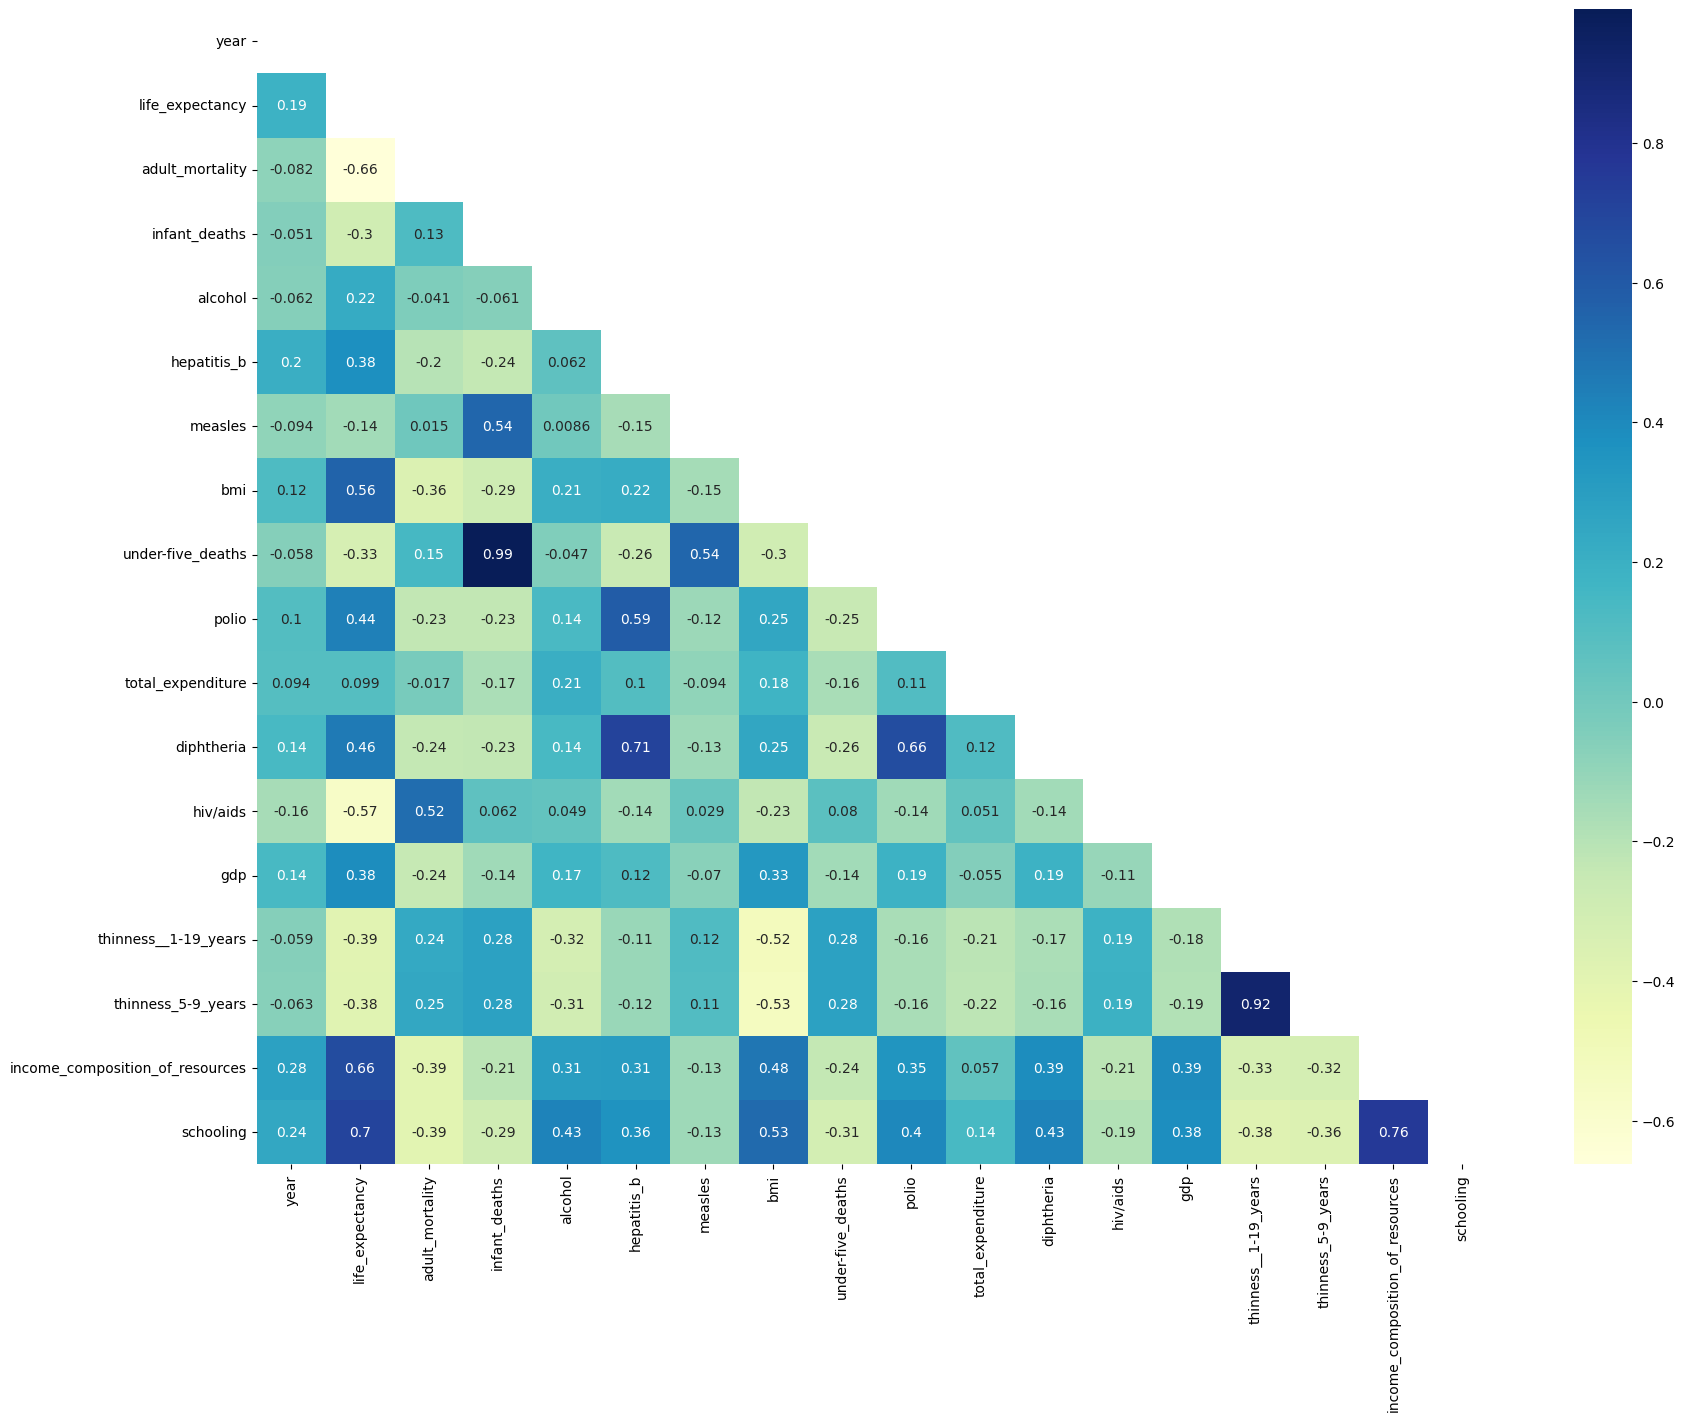

In [12]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),
            cmap = "YlGnBu", 
            mask = mask, # incorporamos la máscara en nuestro plot
           annot = True); 
plt.savefig("graficas/heatmap_completo.png")

    Variables redundantes:

    - under five deaths e infant death, nos quedamos con infant death (1)
    - diphteria con hepatitis_b (0.71) y con polio (0.66), nos quedamos con diphteria.
    - thinness_5-9_years con thinness_1-19_years (0.94), nos quedamos con thinness_1-19_years
  


In [13]:
df.columns

Index(['country', 'status', 'continente', 'year', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'hepatitis_b', 'measles',
       'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'thinness__1-19_years', 'thinness_5-9_years',
       'income_composition_of_resources', 'schooling'],
      dtype='object')

In [15]:
df.drop(columns=['under-five_deaths','hepatitis_b', 'polio' , 'thinness_5-9_years'], axis=1,inplace=True)

In [16]:
df.head(2)

,country,status,continente,year,life_expectancy,adult_mortality,infant_deaths,alcohol,measles,bmi,total_expenditure,diphtheria,hiv/aids,gdp,thinness__1-19_years,income_composition_of_resources,schooling
0,Afghanistan,Developing,Asia,2015.0,65.0,263.0,62.0,0.01,1154.0,19.1,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,Afghanistan,Developing,Asia,2014.0,59.9,271.0,64.0,0.01,492.0,18.6,8.18,62.0,0.1,612.696514,17.5,0.476,10.0


---

### 4. Guardad la gráfica del heatmap.

`Lo hemos guardado en la carpeta graficas`

In [17]:
df.to_csv('../files/endesarrollo_1.csv')